# Data Exploration Phase
At Clean & Green Philly, we are interested in viable candidates that can identify vacant lots with a reasonable accuracy.
Nissim was kind enough to provide me and Maha a exploratory dataset for us to use and protoype with.

# Dataset

In [2]:
import pandas as pd
df = pd.read_parquet("test_output.parquet")
df

,market_value,sale_date,sale_price,opa_id,owner_1,owner_2,building_code_description,zip_code,zoning,parcel_type,...,permit_count,dev_rank,n_total_properties_owned,n_vacant_properties_owned,negligent_dev,tactical_urbanism,conservatorship,park_priority,priority_level,access_process
0,0.0,,NaN,56000023,8TH STREET CALLOWHILL LLC,,IND WAREHOUSE MASONRY,19123,CMX3,Building,...,62.0,Medium,11,0,False,No,No,2.333333,Low,Buy Property
1,0.0,,NaN,56000024,8TH STREET CALLOWHILL LLC,,IND WAREHOUSE MASONRY,19123,CMX3,Building,...,62.0,Medium,11,0,False,No,No,2.333333,Low,Buy Property
2,0.0,,NaN,57000003,TOWNHOMES AT THE RYE,OWNERS ASSO,VACANT LAND RESIDE < ACRE,19123,CMX3,Land,...,260.0,High,2,2,False,Yes,No,2.833333,Low,Buy Property
3,0.0,,NaN,81000009,ZI 1513 PINE LLC,,PD PKG LOT COMMERCIAL,19102,,Building,...,11.0,Low,5,0,False,No,No,1.000000,Low,Buy Property
4,0.0,,NaN,81000010,ZI 1513 PINE LLC,,PD PKG LOT COMMERCIAL,19102,,Building,...,27.0,Low,5,0,False,No,No,2.833333,Low,Buy Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587079,NaN,2024-05-22T04:00:00Z,675000.0,392000003,REID MATTHEW,,IND WAREHOUSE MASONRY,19148,RSA5,Building,...,85.0,Medium,1,0,False,No,No,4.250000,Low,Buy Property
587080,NaN,2024-06-18T04:00:00Z,555000.0,471000016,GHR PROPERTIES LLC,,APTS 5-50 UNITS MASONRY,19130,RM4,Building,...,78.0,Medium,1,0,False,No,No,3.083333,High,Buy Property
587081,NaN,2043-01-01T05:00:00Z,7250.0,441000001,REDEVELOPMENT AUTHORITY,OF PHILADELPHIA,VACANT LAND RESIDE < ACRE,19139,RSA5,Land,...,17.0,Low,970,508,False,Yes,No,NaN,Low,Do Nothing
587082,NaN,2067-03-20T05:00:00Z,1.0,62000005,CITY OF PHILA,DEPT OF PUBLIC PROP,VACANT LAND COMMER < ACRE,19104,RSA5,Land,...,52.0,Medium,1480,874,False,Yes,No,2.333333,High,Buy Property


# Columns

In [12]:
df[df['zip_code'] == '19143']['standardized_address']

243                  739 concord ave, drexel hill pa, 19026
332              5018 baltimore ave, philadelphia pa, 19143
335          5025r willows ave, philadelphia pa, 19143-3326
371                4943 chester ave, philadelphia pa, 19143
393                    13 chatham rd, upper darby pa, 19082
                                ...                        
586874                426 s 44th st, philadelphia pa, 19104
586901               4946 hazel ave, philadelphia pa, 19143
586952                      320 laurel ave, aldan pa, 19018
586967    turnaround philly llc, 1714 memphis st ste c8,...
586977    4700 kingsessing investment llc, 4323 spruce s...
Name: standardized_address, Length: 25455, dtype: object

In [2]:
df.columns

Index(['market_value', 'sale_date', 'sale_price', 'opa_id', 'owner_1',
       'owner_2', 'building_code_description', 'zip_code', 'zoning',
       'parcel_type', 'standardized_address', 'vacant', 'district',
       'neighborhood', 'rco_info', 'rco_names', 'geometry',
       'city_owner_agency', 'side_yard_eligible', 'phs_care_program',
       'owner_type', 'all_violations_past_year', 'open_violations_past_year',
       'l_and_i_complaints_density_percentile',
       'l_and_i_complaints_density_label', 'tree_canopy_gap',
       'gun_crimes_density_percentile', 'gun_crimes_density_label',
       'drug_crimes_density_percentile', 'drug_crimes_density_label',
       'total_due', 'is_actionable', 'payment_agreement', 'num_years_owed',
       'most_recent_year_owed', 'total_assessment', 'sheriff_sale',
       'unsafe_building', 'imm_dang_building', 'n_contiguous', 'permit_count',
       'dev_rank', 'n_total_properties_owned', 'n_vacant_properties_owned',
       'negligent_dev', 'tactical_urb

In [3]:
df[df['vacant']]

,market_value,sale_date,sale_price,opa_id,owner_1,owner_2,building_code_description,zip_code,zoning,parcel_type,...,permit_count,dev_rank,n_total_properties_owned,n_vacant_properties_owned,negligent_dev,tactical_urbanism,conservatorship,park_priority,priority_level,access_process
2,0.0,,NaN,57000003,TOWNHOMES AT THE RYE,OWNERS ASSO,VACANT LAND RESIDE < ACRE,19123,CMX3,Land,...,260.0,High,2,2,False,Yes,No,2.833333,Low,Buy Property
36,0.0,,NaN,181289940,1143-51 N DELAWARE AVE HOLDINGS LLC,,VACANT LAND COMMER ACRE+,19125,CMX3,Land,...,260.0,High,6,5,True,Yes,No,1.500000,Low,Buy Property
65,0.0,,NaN,262402701,SIENA PLACE PUD,,,19145,RSA5,Building,...,203.0,High,1,1,False,No,No,1.416667,Low,Buy Property
67,0.0,,NaN,262405001,SIENA PLACE PUD,,,19145,CMX2,Building,...,203.0,High,1,1,False,No,No,1.416667,Low,Buy Property
69,0.0,,NaN,262405701,SIENA PLACE PUD,,,19145,RSA5,Building,...,203.0,High,2,2,False,No,No,1.416667,Low,Buy Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586255,35659200.0,2004-11-14T05:00:00Z,9050000.0,881443495,B-R PENN REALTY OWNER LP,,APTS 100+ UNITS MASONRY,19130,ICMX,Building,...,45.0,Low,5,1,False,No,Yes,3.583333,Medium,Private Land Use Agreement
586336,41124100.0,2011-08-16T04:00:00Z,4.0,885613000,PHILADELPHIA REGIONAL POR,,NON PD PKG LOT COMMERCIAL,19112,I3,Building,...,79.0,Medium,1,1,False,No,No,NaN,Low,Private Land Use Agreement
586398,47270100.0,1943-01-01T04:00:00Z,1.0,781051065,PHILA PARKING AUTHORITY,,GAR W/COMM AREA MAS+OTHER,19107,CMX5,Building,...,154.0,High,11,1,False,No,Yes,3.083333,High,Private Land Use Agreement
586497,56000000.0,2022-01-24T05:00:00Z,88000000.0,881612425,4233 CHESTNUT PARTNERS LL,,VACANT LAND RESIDE < ACRE,19104,CMX4,Land,...,33.0,Low,3,1,False,Yes,Yes,3.666667,Low,Private Land Use Agreement


candidates:
- vacant(trivially true)
- l_and_i_complaints_density_percentile
- tree_canopy_gap
- gun_crimes_density_percentile
- num_years_owed
- sheriff_sale
- market_value
- parcel_type(potentially candidate for a bayesian logistic regression?)

Possible questions posed:
- parcel type affects them?
- tree_canopy_gap
- sherrif_sale
- Can we incorporate binary classification into our model?

In [4]:
df['sheriff_sale'].unique()

array(['N', 'Y'], dtype=object)

In [5]:
df['parcel_type'].unique()

array(['Building', 'Land'], dtype=object)

In [6]:
df[df['all_violations_past_year'] > 0]

,market_value,sale_date,sale_price,opa_id,owner_1,owner_2,building_code_description,zip_code,zoning,parcel_type,...,permit_count,dev_rank,n_total_properties_owned,n_vacant_properties_owned,negligent_dev,tactical_urbanism,conservatorship,park_priority,priority_level,access_process
122,0.0,2012-08-17T04:00:00Z,1.0,55016533,412 LUXE OWNERS ASSOCIATI,,VACANT LAND RESIDE < ACRE,19123,CMX4,Land,...,132.0,Medium,12,3,False,Yes,Yes,2.833333,Low,Buy Property
294,1500.0,1976-04-01T05:00:00Z,1.0,875102380,NATIONAL RAILROAD,PASSENGER CORP,VACANT LAND RESIDE < ACRE,19124,RM1,Land,...,19.0,Low,67,11,True,Yes,Yes,3.166667,High,Private Land Use Agreement
301,1800.0,1941-03-10T05:00:00Z,1.0,875101820,THE PHILA & READING,RR CO,VACANT LAND INDUST < ACRE,19123,IRMX,Land,...,160.0,High,17,4,False,Yes,Yes,3.000000,Low,Private Land Use Agreement
322,2400.0,1941-03-10T05:00:00Z,1.0,875101810,PHILA & READING,RR CO,VACANT LAND INDUST < ACRE,19123,IRMX,Land,...,160.0,High,17,4,False,Yes,Yes,3.000000,Low,Private Land Use Agreement
326,2600.0,1976-03-30T05:00:00Z,1.0,875104240,CONRAIL,,VACANT LAND BILLBOARD,19137,,Land,...,78.0,Medium,68,12,True,Yes,Yes,2.500000,High,Private Land Use Agreement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587000,NaN,2021-02-03T05:00:00Z,300000.0,871000068,LI JINGHUN,SUN ZHAOYING,ROW B/OFF-STR 2 STY MASON,19136,RSA5,Building,...,15.0,Low,1,0,False,No,Yes,2.583333,Low,Buy Property
587003,NaN,2021-04-30T04:00:00Z,1.0,881000672,GRAND REALTY LLC,,VACANT LAND COMMER < ACRE,19130,CMX2.5,Land,...,12.0,Low,1,0,False,No,Yes,1.500000,Low,Buy Property
587010,NaN,2021-06-01T04:00:00Z,1.0,62000008,ABE KOCH,,VACANT LAND COMMER < ACRE,19104,RSA5,Land,...,45.0,Low,1,0,False,Yes,Yes,3.500000,Medium,Buy Property
587040,NaN,2022-04-08T04:00:00Z,1350000.0,881000868,VICTORY ESTATE LLC,,IND SHOP MASONRY,19134,RSA5,Building,...,10.0,Low,1,0,False,No,Yes,3.333333,High,Buy Property


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/792034254.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vacant_properties['market_value'], shade=True)


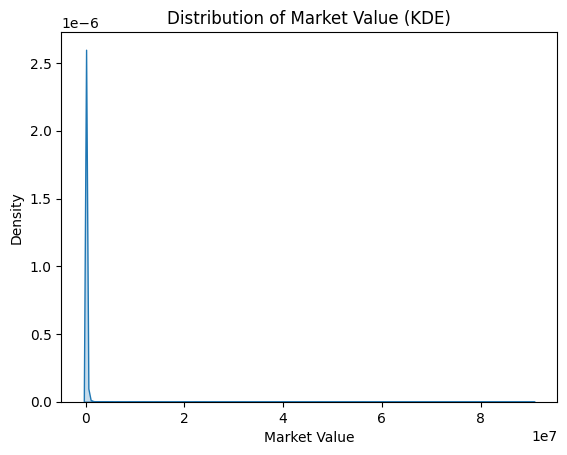

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
vacant_properties = df[df['vacant']]

sns.kdeplot(vacant_properties['market_value'], shade=True)
plt.title('Distribution of Market Value (KDE)')
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.show()


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/884047336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacant_properties['log_market_value'] = np.log1p(vacant_properties['market_value'])  # Use log(1+x) to handle zero values
/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/884047336.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vacant_properties['log_market_value'], shade=True)


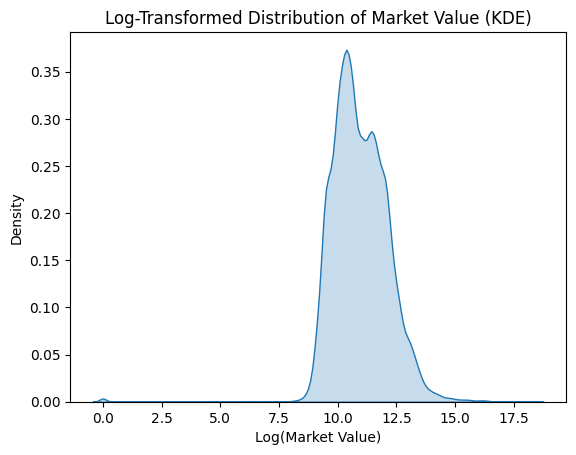

In [8]:
import numpy as np

vacant_properties['log_market_value'] = np.log1p(vacant_properties['market_value'])  # Use log(1+x) to handle zero values
sns.kdeplot(vacant_properties['log_market_value'], shade=True)
plt.title('Log-Transformed Distribution of Market Value (KDE)')
plt.xlabel('Log(Market Value)')
plt.ylabel('Density')
plt.show()


In [9]:
df.dropna()

,market_value,sale_date,sale_price,opa_id,owner_1,owner_2,building_code_description,zip_code,zoning,parcel_type,...,permit_count,dev_rank,n_total_properties_owned,n_vacant_properties_owned,negligent_dev,tactical_urbanism,conservatorship,park_priority,priority_level,access_process
1622,8800.0,2019-07-26T04:00:00Z,14100.0,372126300,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19133,RM1,Land,...,20.0,Low,9,8,False,Yes,No,4.166667,High,Go through Land Bank
1975,9300.0,2018-03-27T04:00:00Z,47500.0,132071800,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19140,RSA5,Land,...,12.0,Low,1237,1105,False,Yes,No,3.833333,High,Go through Land Bank
2266,9500.0,2020-08-14T04:00:00Z,0.0,162127600,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19132,RSA5,Land,...,43.0,Low,178,172,False,Yes,No,4.333333,High,Go through Land Bank
3468,11600.0,2018-05-03T04:00:00Z,29900.0,132205600,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19140,RSA5,Land,...,17.0,Low,1,1,False,Yes,No,4.500000,High,Go through Land Bank
4374,12400.0,2007-03-29T04:00:00Z,4.0,111390700,PHILA REDEVELOPMENT AUTH,,VACANT LAND RESIDE < ACRE,19132,RSA5,Land,...,22.0,Low,484,368,False,Yes,No,3.916667,High,Do Nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31400,44000.0,1956-10-03T04:00:00Z,1.0,472007410,REDEVELOPMENT AUTHORITY,OF PHILADELPHIA,VACANT LAND RESIDE < ACRE,19121,RSA5,Land,...,97.0,Medium,970,508,False,Yes,Yes,3.166667,High,Do Nothing
33821,48600.0,2020-08-14T04:00:00Z,0.0,41280400,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19131,RSA3,Land,...,37.0,Low,178,172,False,Yes,No,2.916667,High,Go through Land Bank
33889,48800.0,2020-08-14T04:00:00Z,0.0,371161900,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19133,CMX2,Land,...,217.0,High,178,172,False,Yes,No,3.000000,High,Go through Land Bank
34530,49400.0,2019-08-16T04:00:00Z,66600.0,441098000,PHILADELPHIA LAND BANK,,VACANT LAND RESIDE < ACRE,19139,RM1,Land,...,26.0,Low,1,1,False,Yes,No,3.250000,High,Go through Land Bank


In [10]:
from scipy.stats import pointbiserialr

# Filter out rows with missing values in 'vacant' and 'market_value'
filtered_data = df[df['vacant'].notnull() & df['market_value'].notnull()]

# Separate the binary variable and the continuous variable
x = filtered_data['vacant']  # Binary classification
y = filtered_data['market_value']  # Continuous values

# Calculate point-biserial correlation
correlation, p_value = pointbiserialr(x, y)
print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")

Point-Biserial Correlation: -0.02061463391463027, P-value: 6.99617673191515e-56


In [11]:
correlation
p_value

6.99617673191515e-56

In [12]:
import numpy as np

filtered_data['log_market_value'] = np.log1p(filtered_data['market_value'])  # log(1+x) handles zeros gracefully

x = filtered_data['vacant']
y_log = filtered_data['log_market_value']

correlation, p_value = pointbiserialr(x, y_log)
print(f"Point-Biserial Correlation (Log-Transformed): {correlation}, P-value: {p_value}")

Point-Biserial Correlation (Log-Transformed): -0.3462189067981672, P-value: 0.0


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/2330827509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_market_value'] = np.log1p(filtered_data['market_value'])  # log(1+x) handles zeros gracefully


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/911344339.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vacant_properties['num_years_owed'], shade=True)


<Axes: xlabel='num_years_owed', ylabel='Density'>

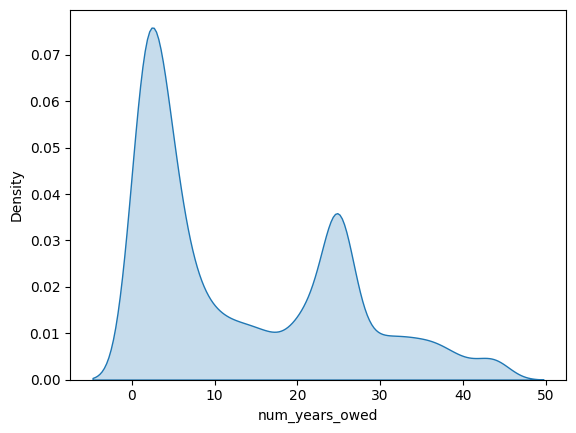

In [13]:
sns.kdeplot(vacant_properties['num_years_owed'], shade=True)

In [14]:
filtered_num_years = df[df['vacant'].notnull() & df['num_years_owed'].notnull()]

correlation, p_value = pointbiserialr(filtered_num_years['vacant'], np.log1p(filtered_num_years['num_years_owed']))
print(f"Point-Biserial Correlation (Log-Transformed): {correlation}, P-value: {p_value}")

Point-Biserial Correlation (Log-Transformed): 0.27330099876935304, P-value: 0.0


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/2822333061.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vacant_properties['gun_crimes_density_percentile'], shade=True)


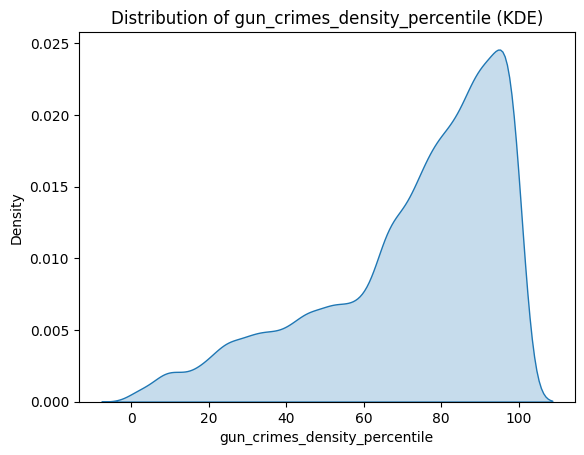

In [18]:
import numpy as np

# vacant_properties['log_gun_crimes_density_percentile'] = np.log1p(vacant_properties['gun_crimes_density_percentile'])  # Use log(1+x) to handle zero values
sns.kdeplot(vacant_properties['gun_crimes_density_percentile'], shade=True)
plt.title('Distribution of gun_crimes_density_percentile (KDE)')
plt.xlabel('gun_crimes_density_percentile')
plt.ylabel('Density')
plt.show()


In [22]:
gun_crimes_density_percentile = df[df['vacant'].notnull() & df['gun_crimes_density_percentile'].notnull()]

correlation, p_value = pointbiserialr(gun_crimes_density_percentile['vacant'], gun_crimes_density_percentile['gun_crimes_density_percentile'])
print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")

Point-Biserial Correlation: 0.18946342500703556, P-value: 0.0


/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_84236/1359250609.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vacant_properties['tree_canopy_gap'], shade=True)


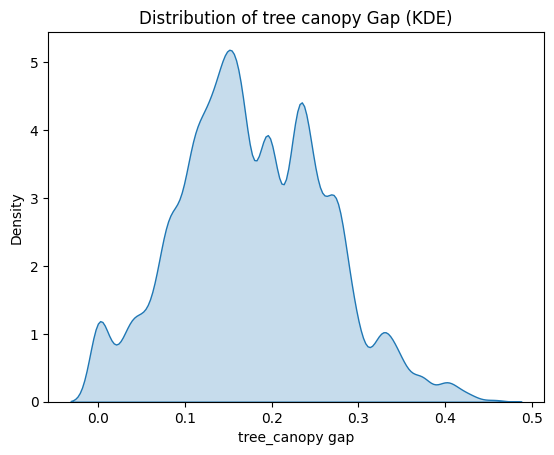

In [24]:
sns.kdeplot(vacant_properties['tree_canopy_gap'], shade=True)
plt.title('Distribution of tree canopy Gap (KDE)')
plt.xlabel('tree_canopy gap')
plt.ylabel('Density')
plt.show()

In [26]:
tree_canopy_gap = df[df['vacant'].notnull() & df['tree_canopy_gap'].notnull()]

correlation, p_value = pointbiserialr(tree_canopy_gap['vacant'], tree_canopy_gap['tree_canopy_gap'])
print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")

Point-Biserial Correlation: 0.02548078105623454, P-value: 2.450297559625915e-84


Now we investigated feature and their correlations, we investigated using some methods.
## Mutual information

https://en.wikipedia.org/wiki/Mutual_information